# **1. Problem Statement**


A wine’s quality is not absolute: how great a wine is or isn’t depends on who is doing the judging. a high wine rating — implying high quality — translates into increased sales for a wine. But quality wines come in all colors, degrees of sweetness and dryness, and flavor profiles. The purpose of this study is to explore wine data, with a goal of selecting right attributes for classifying wine into one of the quality categories: poor, normal and excellent. 


<img src = 'https://mep.metrohm.com.au/wp-content/uploads/2016/04/WL69_M1577-WL69-LP-9452-712x380.jpg'>

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


import warnings
warnings.filterwarnings('ignore') 

In [0]:
!pip install pandas-profiling 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

The used dataset consists of 13 variable, eleven of which are the characteristics of wine that potentially influence its quality. The variable quality represents the evaluation of perceived wine quality.

In [0]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0  7.4            0.70              0.00         ...  0.56       9.4      5      
1  7.8            0.88              0.00         ...  0.68       9.8      5      
2  7.8            0.76              0.04         ...  0.65       9.8      5      
3  11.2           0.28              0.56         ...  0.58       9.8      6      
4  7.4            0.70              0.00         ...  0.56       9.4      5      

[5 rows x 12 columns]

<a id=section301></a>
### Description of the Dataset

- This dataset provides a **component analysis** of different wines for the **Quality Analysis**  including alcohol level, density, sugar and acidity.

- The used dataset consists of 12 variable, eleven of which indicate the characteristics of wine that have an influence on its quality. The variable specified as **quality** indicates the evaluation of perceived wine quality.





| Column Name                    | Description                                                                                 |
| :-------------------------------|:------------------------------------------------------------------------------------------ | 
| fixed acidity                  | most acids involved with wine or fixed or nonvolatile (do not evaporate readily).           | 
| volatile acidity               | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant,   | 
|                                | vinegar taste.                                                                              | 
| citric acid                    | found in small quantities, citric acid can add 'freshness' and flavor to wines.             | 
| residual sugar                 | the amount of sugar remaining after fermentation stops, it's rare to find wines with less   |
|                                | than 1 gram/liter and wines with greater than 45 grams/litre are considered sweet.          |
| chlorides                      | the amount of salt in the wine.                                                              |
| free sulfur dioxide            | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and   |
|                                | bisulfite ion; it prevents microbial growth and the oxidation of wine.                      |    | 
|total sulfur dioxide            | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in |
|                                | wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste |
|                                | of wine.                                                                                    |
| density                        | the density of water is close to that of water depending on the percent alcohol and sugar   | 
|                                | content.                                                                                     | 
|pH                             | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); |
|                                | most wines are between 3-4 on the pH scale.                                                  |
| sulphates                      | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an    |
|                                | antimicrobial and antioxidant.                                                               |
| alcohol                        | the percent alcohol content of the wine.                                                     |
| quality                        | output variable (based on sensory data, score between 0 and 10).                             |



In [0]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


- info function gives us the following insights into the df_wine dataframe:

    - There are a total of 6497 samples (rows) and 12 columns in the dataframe.

    - All columns have numeric datatype.
    
    - There are no categorical data.
    
    - There are 0 missing values in the data.

In [0]:
df_wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count  6497.000000    6497.000000       ...  6497.000000  6497.000000
mean   7.215307       0.339666          ...  10.491801    5.818378   
std    1.296434       0.164636          ...  1.192712     0.873255   
min    3.800000       0.080000          ...  8.000000     3.000000   
25%    6.400000       0.230000          ...  9.500000     5.000000   
50%    7.000000       0.290000          ...  10.300000    6.000000   
75%    7.700000       0.400000          ...  11.300000    6.000000   
max    15.900000      1.580000          ...  14.900000    9.000000   

[8 rows x 12 columns]

-  describe function gives us the following insights into the data:

    - Almost all columns are having an almost normal distribution because the mean value is close to the median value(50%).
    
    - residual sugar positively skewed(right) because the mean (5.443235) lies to the right of the median(50%) value (3.000000),          on a distribution plot.

    - The max value of free Sulphur Dioxide (289) is an outlier because it lie far away from the mean and 75% quartile.

    - Similarly comparing the 75% and max values of the other columns we can see that there are outliers present in some other columns.

In [0]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_wine)
profile.to_file(outputfile="Pandas Profiling before Data Preprocessing.html")
from google.colab import files
files.download("Pandas Profiling before Data Preprocessing.html")

# Observations from Pandas Profiling before Data Processing


6497 rows of data with zero missing values but having duplicates. All columns are numerical in nature.
Zeros are observed in citric acid.

1.   **Alcohol**

      *   has a minimum value of 8 and median at 10.3
      *   mean and median are approximately equal.
      *   95% of the data lies below 12.7 
      *   A maximum value of 14.9
      *   The data has negative kurtosis i.e it is flatter than a normal curve indicating a  platykurtic distribution.
      *   the skewness for this dataset is 0.56.  A positive skewness indicates that the size of the right-handed tail is larger than the left-handed tail indicating outliers.
      *   40% of the values range between 9 and 11
      *   SD and variance is low indicating the data is mostly concentrated around the mean. A low IQR also confirms the same.
2.   ***Chlorides***

      *  214 distinct values
      *  The data has positive kurtosis i.e it is narrower than a normal curve indicating a  leptokurtic distribution with larger tails.
      *  A positive skewness indicates that the size of the right-handed tail is larger than the left-handed tail indicating outliers.
      *  A significant number of outliers are present here .
      * SD and variance is extremely low , indicating a low spread.

3.   ***Citric acid***
      *  89 distinct values
      *  The data has positive kurtosis i.e it is narrower than a normal curve indicating a  leptokurtic distribution with larger tails.
      *  A positive skewness indicates that the size of the right-handed tail is larger than the left-handed tail indicating outliers.
      *  SD and variance is extremely low , indicating a low spread

4. ***Density*** 

      *  998 distinct values
      *  The data has high positive kurtosis i.e it is narrower than a normal curve indicating a  leptokurtic distribution with larger tails.
      *  SD and variance is extremely high , indicating outliers.
      *  IQR is very low. Significant number of outliers are present .
      *  Highly uncorrelated with alcohol

5. ***Fixed acidity***

    *  The data has high positive kurtosis i.e it is narrower than a normal curve indicating a  leptokurtic distribution with larger tails.
    *  A positive skewness indicates that the size of the right-handed tail is larger than the left-handed tail indicating outliers.
    *  SD and variance is high , indicating outliers
    *  IQR is very low. Significant number of outliers are present .
    
6. ***Free Sulphur dioxide***
    *  a  leptokurtic distribution due to high positive kurtosis with larger tails.
    *  A positive skewness observed.
    *  SD and variance is very high , indicating outliers
    *  IQR is high, very large spread of data. Significant number of outliers are present .
    *  Highly correlated with total Sulphur dioxide
7. ***pH***   
    
    *  closer to a normal curve
    *  Moderate skewness and Kurtosis observed
    *  Variance is low.
    *  Histogram indicates a normal curve .
    *  Outliers may not be present .
    
8. ***Quality***
    *  95% data lies in the range of 5-6.
    *  Skewness and kurtosis is nearly zero.
    *  Low IQR, SD and variance .
    *  Outliers not expected. 
    *  Resembles a normal curve.
9. ***Residual Sugar***  

    *  Outliers present as skewness and kurtosis are high. 
    *  Variance is very high.
    *  IQR high.
    
10.  ***Sulphates*** 
      *  Kurtosis and skewness is high 
      *  Mean and median are approximately equal.
      *  Since the max value is much ahead than the 95th percentile, outliers are expected
      *  IQR is low.
      
11. ***Total Sulphur dioxide***     
      *  Very high IQR .
      *  Mean is less than median.
      *  Skewness and kurtosis is negative.
      *  High SD and variance
      *  Outliers expected.
12. ***Volatile Acidity*** 
      *  Skewness and kurtosis is high.
      *  IQR , SD and variance is also low.
      *  Since 95th percentile and max has a larger difference , hence outliers are expected.


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [0]:
#analysis of outliers in chlorides
df_wine[df_wine['chlorides']>0.1055].count()

fixed acidity           286
volatile acidity        286
citric acid             286
residual sugar          286
chlorides               286
free sulfur dioxide     286
total sulfur dioxide    286
density                 286
pH                      286
sulphates               286
alcohol                 286
quality                 286
dtype: int64

<a id=section401></a>
###  Removing Outliers
Here we have taken an assumption that the outliers are to be considered beyond 1.5 times the Inter Quartile Range

In [0]:
#calculating IQR
Q1=df_wine.quantile(0.25)
Q3=df_wine.quantile(0.75)
IQR=Q3-Q1
IQR

fixed acidity           1.30000 
volatile acidity        0.17000 
citric acid             0.14000 
residual sugar          6.30000 
chlorides               0.02700 
free sulfur dioxide     24.00000
total sulfur dioxide    79.00000
density                 0.00465 
pH                      0.21000 
sulphates               0.17000 
alcohol                 1.80000 
quality                 1.00000 
dtype: float64

In [0]:
df_wine_clean=df_wine[~((df_wine< (Q1- 1.5*IQR)) | (df_wine > (Q3 + 1.5*IQR))).any(axis=1) ]
df_wine_clean.head()


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
6   7.9            0.60              0.06         ...  0.46       9.4      5      
9   7.5            0.50              0.36         ...  0.80       10.5     5      
10  6.7            0.58              0.08         ...  0.54       9.2      5      
11  7.5            0.50              0.36         ...  0.80       10.5     5      
16  8.5            0.28              0.56         ...  0.75       10.5     7      

[5 rows x 12 columns]

<a id=section401></a>
###  Adding an additional column Rating
The wine is given rating as good , average or bad depending on the quality score.

In [0]:
conditions = [
    (df_wine_clean['quality'] >= 7),
    (df_wine_clean['quality'] <= 4)
]
rating = ['good', 'bad']
df_wine_clean['rating'] = np.select(conditions, rating, default='average')
df_wine_clean.rating.value_counts()

average    3778
good       925 
bad        137 
Name: rating, dtype: int64

In [0]:
df_wine_clean.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality   rating
6   7.9            0.60              0.06         ...  9.4      5        average
9   7.5            0.50              0.36         ...  10.5     5        average
10  6.7            0.58              0.08         ...  9.2      5        average
11  7.5            0.50              0.36         ...  10.5     5        average
16  8.5            0.28              0.56         ...  10.5     7        good   

[5 rows x 13 columns]

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [0]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_wine_clean)
profile.to_file(outputfile="Pandas Profiling after Data Preprocessing.html")
from google.colab import files
files.download("Pandas Profiling after Data Preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 14
- Number of observations: 4840
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 13
- Categorical = 1

<br>
all variables are fit for analysis now. The plots for most of the variables is similar to normal distrubution with mild changes.

<a id=section401></a>
## Univariate Analysis

Text(1.0, 1.0, 'alcohol and chlorides- data view')

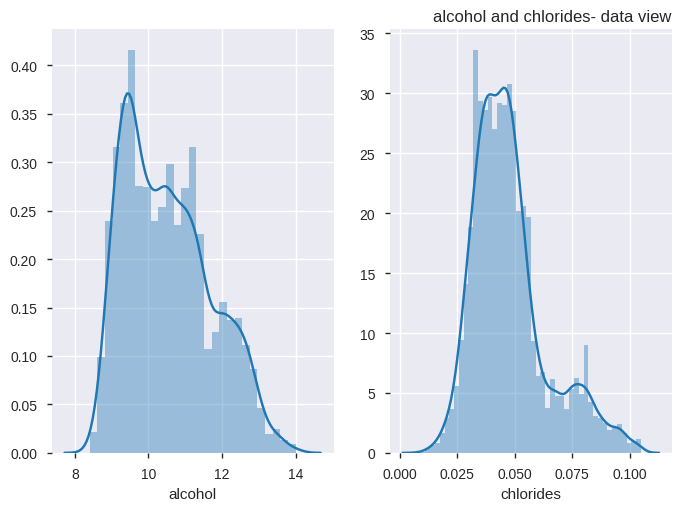

In [75]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.distplot(df_wine_clean['alcohol'], ax=ax[0])
sns.distplot(df_wine_clean['chlorides'], ax=ax[1])
plt.title('alcohol and chlorides- data view',loc='right')

In [59]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.distplot(df_wine_clean['citric acid'], ax=ax[0])
sns.distplot(df_wine_clean['density'], ax=ax[1])
plt.title('citric acid and density- data view',loc='left')

Text(0.0, 1.0, 'citric acid and density- data view')

Text(0.0, 1.0, 'free sulfur dioxide and total sulfur dioxide - data view')

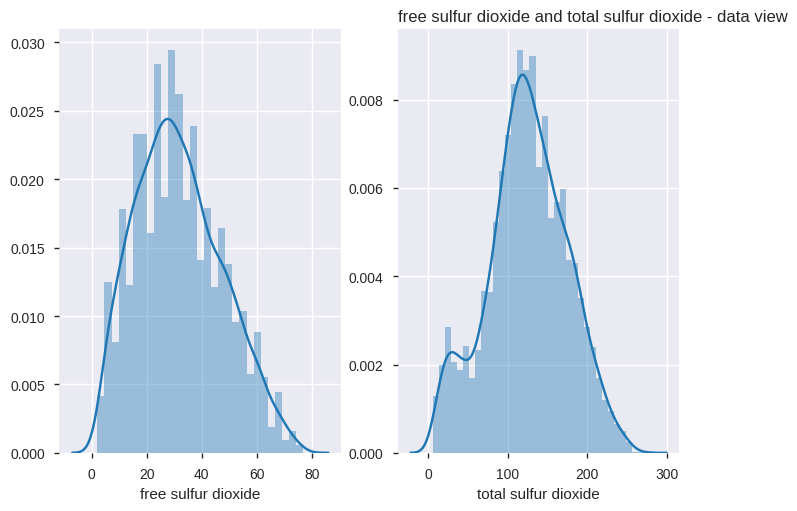

In [67]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.distplot(df_wine_clean['free sulfur dioxide'], ax=ax[0])
sns.distplot(df_wine_clean['total sulfur dioxide'], ax=ax[1])
plt.title('free sulfur dioxide and total sulfur dioxide - data view',loc='left')

Text(0.0, 1.0, 'sulphates and pH - data view')

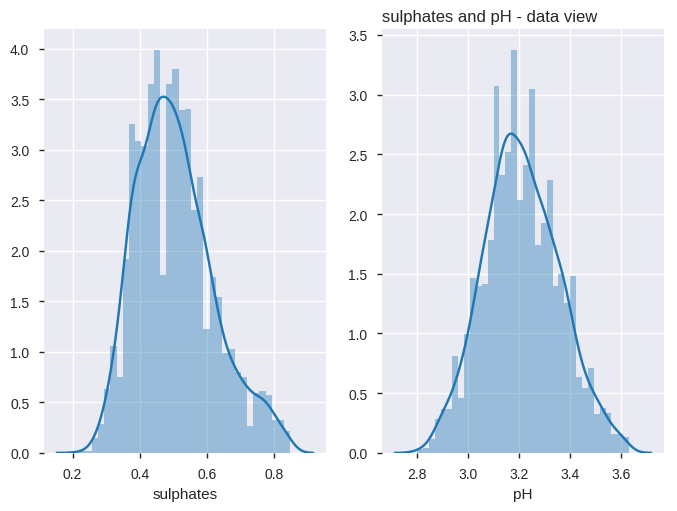

In [68]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.distplot(df_wine_clean['sulphates'], ax=ax[0])
sns.distplot(df_wine_clean['pH'], ax=ax[1])
plt.title('sulphates and pH - data view',loc='left')

Text(0.0, 1.0, 'fixed acidity and volatile acidity - data view')

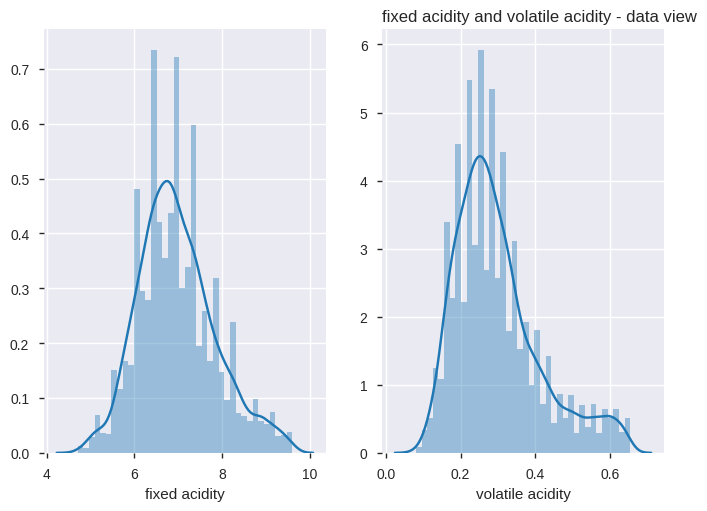

In [69]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.distplot(df_wine_clean['fixed acidity'], ax=ax[0])
sns.distplot(df_wine_clean['volatile acidity'], ax=ax[1])
plt.title('fixed acidity and volatile acidity - data view',loc='left')


###  The above distribution of different componemts indicates the data is fit for analysis. The data set closely resembles a normally distributed data set without outliers and missing values.


Text(0.0, 1.0, 'quality and rating - data view')

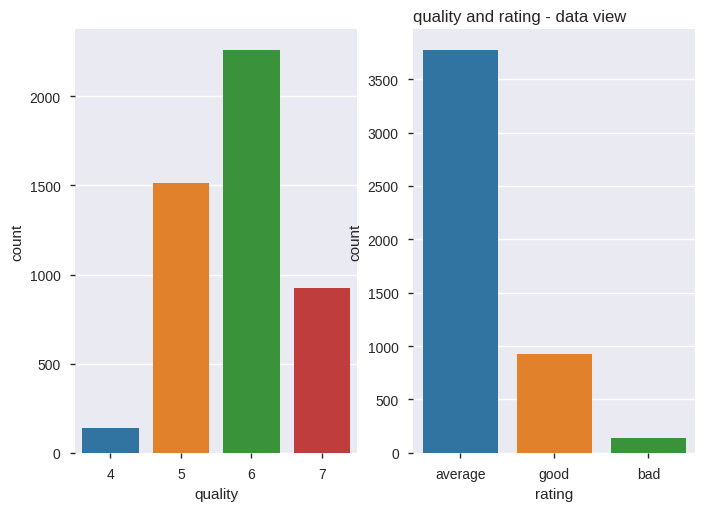

In [88]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.countplot(df_wine_clean['quality'], ax=ax[0])
sns.countplot(df_wine_clean['rating'], ax=ax[1])
plt.title('quality and rating - data view',loc='left')
#fig.show()

### The count plots for quality and rating as presented above indicate that we have a blended data for all types of wine . The quality maps to rating as follows

1. If quality range is **less than or equals 4**, the wine is labelled as **bad**.
2. If quality range is **between 5 and 7**, the wine is labelled as **average**.
3. If quality range is **greater than or equals 7**, the wine is labelled as **good**.



# Bivariate analysis

<a id=section401></a>
## Correlation Analysis

Text(0.5, 1.0, 'Correlation heatmap')

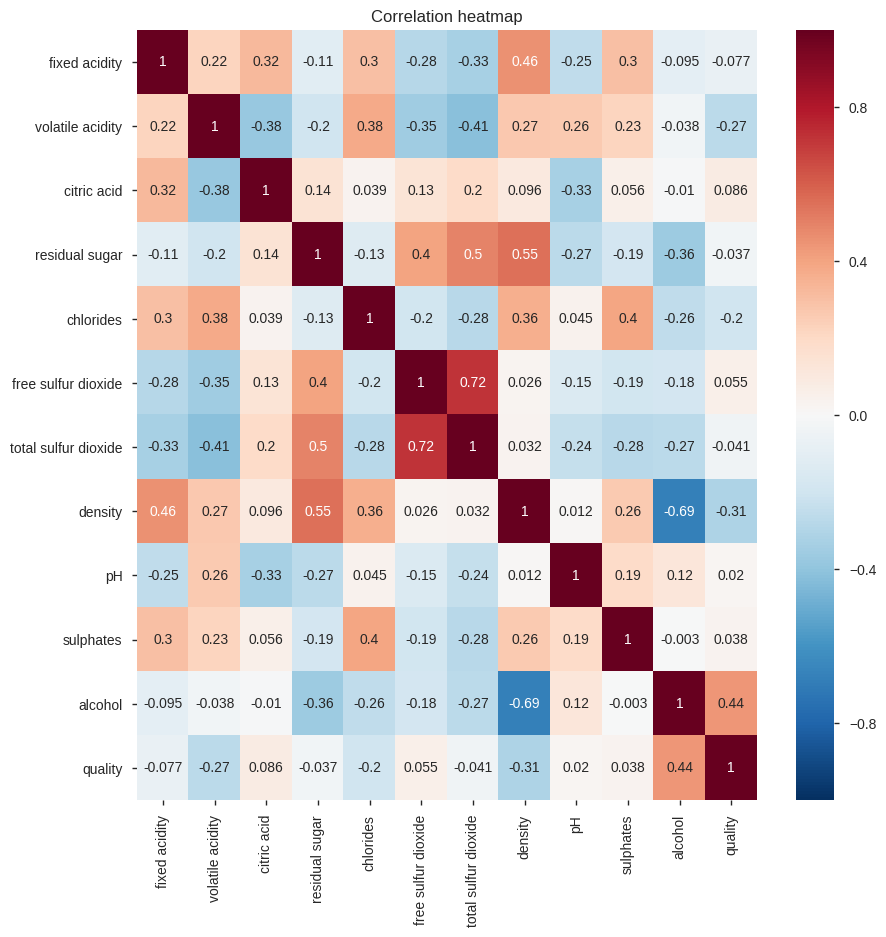

In [80]:
correlation = df_wine.corr()
# display(correlation)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.title('Correlation heatmap',loc='center')

In [115]:
corr=df_wine_clean.corr()['quality']
corr[np.argsort(corr,axis=0)[::-1]]

quality                 1.000000
alcohol                 0.428784
citric acid             0.079471
free sulfur dioxide     0.055663
sulphates               0.054356
pH                      0.039561
residual sugar         -0.045903
total sulfur dioxide   -0.090688
fixed acidity          -0.091185
volatile acidity       -0.226764
chlorides              -0.256976
density                -0.304314
Name: quality, dtype: float64

The squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are .The squares that have negative values show an inverse co-relationship. The more negative these values become, the more inversely proportional they are.Finally, squares close to zero indicate almost no co-dependency between those sets of features.

In [0]:
pd.plotting.scatter_matrix(df_wine_clean, alpha = .1, figsize = (40,40), diagonal = 'kde');
plt.title('Correlation for all components',loc='center')


From the above scatterplot we can get some interesting details. For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed. So this confirms our initial suspicions — there are indeed some interesting co-dependencies between some of the features.
We can plot a heatmap of co-relations between features, which will help us get more insights.

## does pH level affect fixed acidity levels? 

Text(0.0, 1.0, 'fixed acidity vs pH')

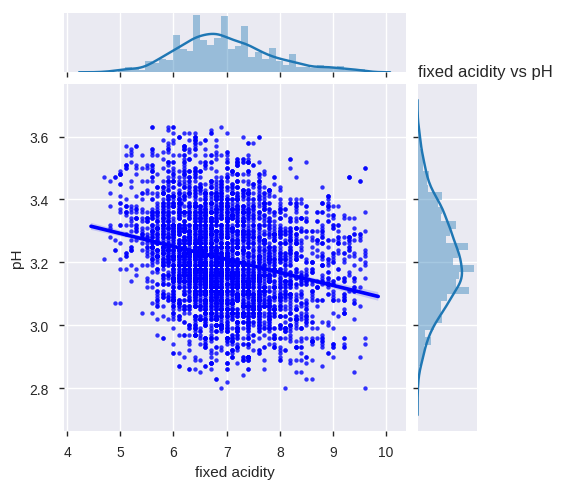

In [102]:
#Visualize the co-relation between pH and fixed Acidity

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = df_wine_clean[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=5)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10},color='blue')

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)
plt.title('fixed acidity vs pH',loc='left')

## does citric acid effect acidity level in wine?

In [103]:
#Visualize the co-relation between fixed Acidity and citric acid
#Create a new dataframe containing only fixed acidity and citric acid columns to visualize their co-relations

fixedAcidity_pH = df_wine_clean[['citric acid', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_pH, height=5)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)
plt.title('fixed acidity vs citric acid',loc='left')

Text(0.0, 1.0, 'fixed acidity vs citric acid')

## How are density and alcohol related?

In [134]:
plt.figure(figsize=(15,6))
sns.jointplot(y=df_wine_clean["density"],x=df_wine_clean["alcohol"],kind="hex")
plt.title('alcohol vs density',loc='left')

Text(0.0, 1.0, 'alcohol vs density')

<Figure size 1500x600 with 0 Axes>

## what role does chlorides play in modifying the taste of wine?

Text(0, 0.5, 'chlorides')

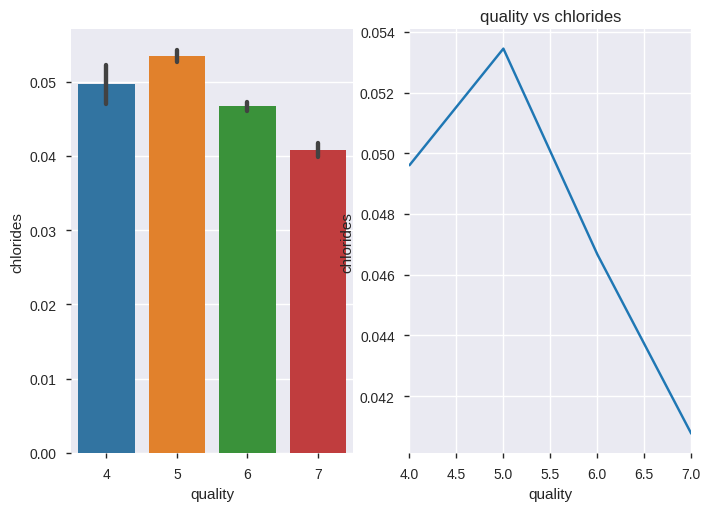

In [137]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.barplot(x = 'quality', y = 'chlorides', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('quality')['chlorides'].mean().plot.line()
plt.title('quality vs chlorides',loc='center')
plt.ylabel("chlorides")

## Do acidity levels have anything to do with the quality?

In [138]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('quality')['fixed acidity'].mean().plot.line()
plt.title('quality vs fixed acidity',loc='center')
plt.ylabel("fixed acidity")

Text(0, 0.5, 'fixed acidity')

Text(0.5, 1.0, 'quality vs volatile acidity')

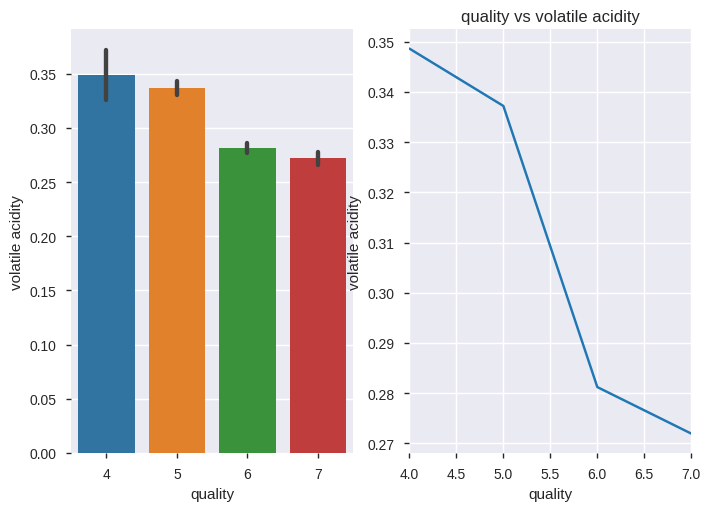

In [140]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('quality')['volatile acidity'].mean().plot.line()
plt.ylabel("volatile acidity")
plt.title('quality vs volatile acidity',loc='center')


## Do people find wines with more alcohol content to be tastier or of better quality?

Text(0.5, 1.0, 'rating vs alcohol')

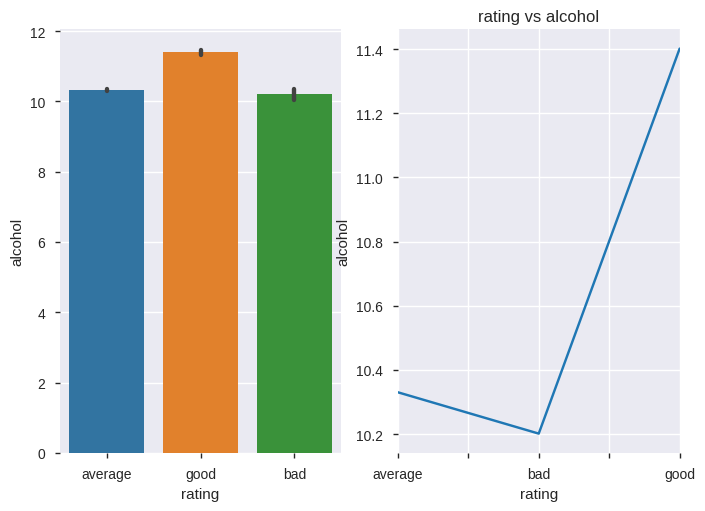

In [143]:
fig, ax =plt.subplots(1,2,squeeze='False')
sns.barplot(x = 'rating', y = 'alcohol', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('rating')['alcohol'].mean().plot.line()
plt.ylabel("alcohol")
plt.title('rating vs alcohol',loc='center')

## how does citric acid affect wine quality?

In [144]:

fig, ax =plt.subplots(1,2,squeeze='False')
sns.barplot(x = 'rating', y = 'citric acid', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('rating')['citric acid'].mean().plot.line()
plt.ylabel("citric acid")
plt.title('rating vs citric acid',loc='center')

Text(0.5, 1.0, 'rating vs citric acid')

## To what extent is residual sugar involved in wine quality?

Text(0.5, 1.0, 'rating vs residual sugar')

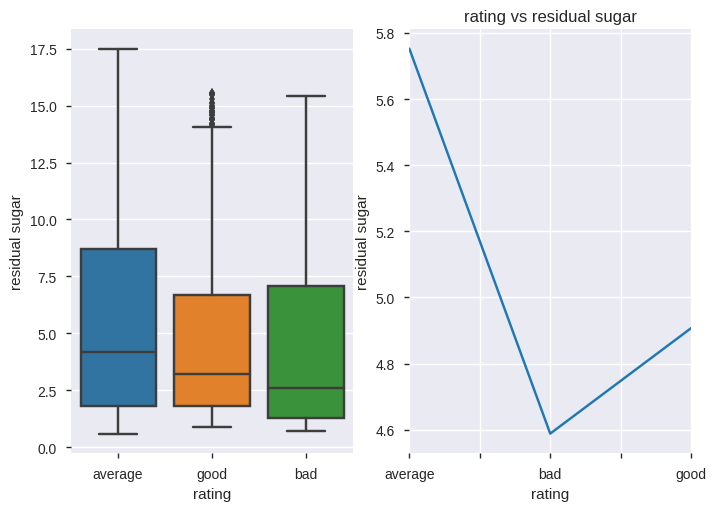

In [174]:

fig, ax =plt.subplots(1,2,squeeze='False')
sns.boxplot(x = 'rating', y = 'residual sugar', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('rating')['residual sugar'].mean().plot.line()
plt.ylabel("residual sugar")
plt.title('rating vs residual sugar',loc='center')

## Are Sulphates required in wine?

Text(0.5, 1.0, 'quality vs sulphates')

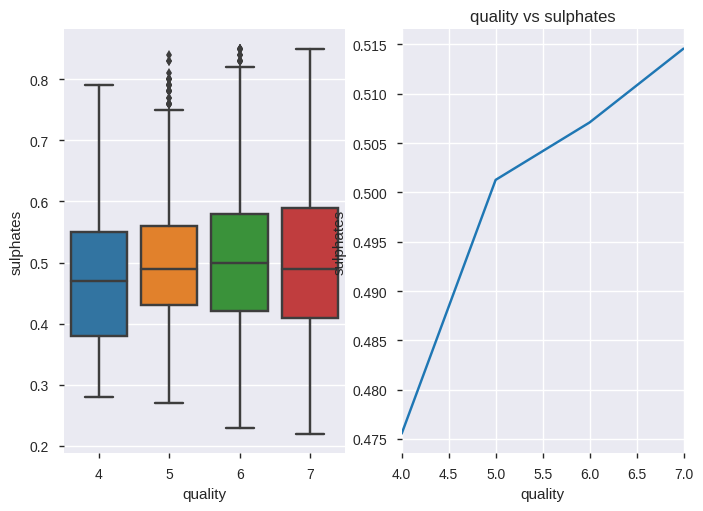

In [152]:

fig, ax =plt.subplots(1,2,squeeze='False')
sns.boxplot(x = 'quality', y = 'sulphates', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('quality')['sulphates'].mean().plot.line()
#df_wine_clean.groupby('rating')['sulphates'].mean().plot.line()
plt.ylabel("sulphates")
plt.title('quality vs sulphates',loc='center')

In [155]:

fig, ax =plt.subplots(1,2,squeeze='False')
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('quality')['total sulfur dioxide'].mean().plot.line()
plt.ylabel("total sulfur dioxide")
plt.title('quality vs total sulfur dioxide',loc='center')

Text(0.5, 1.0, 'quality vs total sulfur dioxide')

## Is wine acidic or alcoholic in nature?

In [158]:

fig, ax =plt.subplots(1,2,squeeze='False')
sns.boxplot(x = 'quality', y = 'pH', data = df_wine_clean, ax=ax[0])
df_wine_clean.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")
plt.title('quality vs pH',loc='center')

Text(0.5, 1.0, 'quality vs pH')

# Insights derived from bivariate analysis

- These plots shows how the values of pH change with changing fixed acidity levels. We can see that, as fixed acidity levels increase, the pH levels drop. A lower pH level is, after all, an indicator of high acidity.

- A **higher quality** is usually associated with** low volatile acidity levels**. This makes sense, because volatile acidity is an indicator of spoilage and could give rise to unpleasant aromas — consistent with our domain knowledge.

- For **high and exellent quality** of wine , **fixed acidity should be low**. As observed from the trend, the median acidity decreases with increasing quality. 

- The **chloride** content should also be **low for a good quality wine**.The amount of chlorides present in a wine is usually an indicator of its “saltiness.” Too much saltiness is considered undesirable. The inappropriate proportion can make the wine more savory.

- **High alcohol** is required for **better quality** wine.

- Citric acid is generally found in very small quantities in wines. It acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. Too much in excess, however, can ruin the taste. As the amount of **citric acids increase**, so do the **fixed acidity levels** and enhances the wine quality.

- Residual Sugar,refers to any natural grape sugars that are leftover after fermentation ceases (whether on purpose or not). The juice of wine grapes starts out intensely sweet, and fermentation uses up that sugar as the yeasts feast upon it. We require a **low residual sugar for better quality.**

- Since sulphates add a bit of a “sharp” taste,**high sulphates result into a better quality wine**.

- **high ph** on the acidic side(lower than 7) for better quality of wine is expected.

- **low sulphur dioxide** for better quality . It is the most common preservative used, usually added by wine makers to protect the wine from negative effects of exposure to air and oxygen. Since preservatives are required in a small ratio, a low level of sulphur dioxide is preferred.


# Multivariate Analysis

In [181]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_wine_clean, y='chlorides', x='fixed acidity',hue='quality',palette="Set3")

plt.title('Scatter plot showing the variation of fixed acidity with chlorides in data items with a hue based on quality')
plt.grid(False)
plt.legend(fontsize=8)

In [183]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_wine_clean, x='sulphates', y='alcohol',hue='quality',palette="Set2",cmap='red')
plt.title('Scatter plot showing the variation of sulphates with alcohol in data item with a hue based on quality')
plt.grid(False)
plt.legend(fontsize=12)

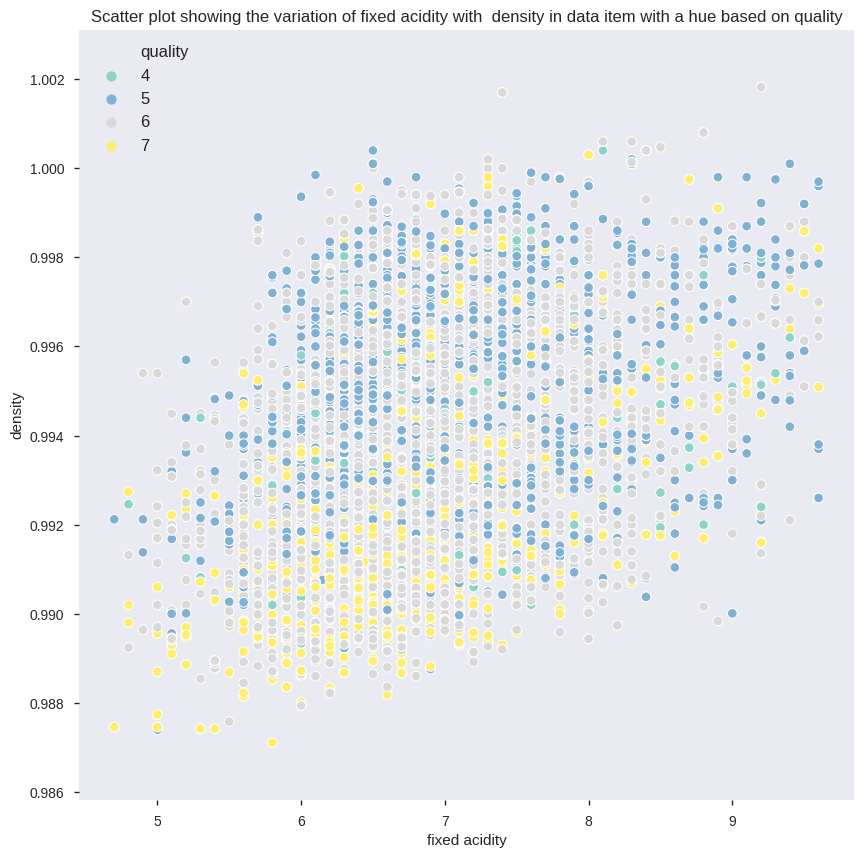

In [185]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_wine_clean, y='density', x='fixed acidity',hue='quality',palette="Set3",cmap='red')
plt.title('Scatter plot showing the variation of fixed acidity with  density in data item with a hue based on quality')
plt.grid(False)
plt.legend(fontsize=12)

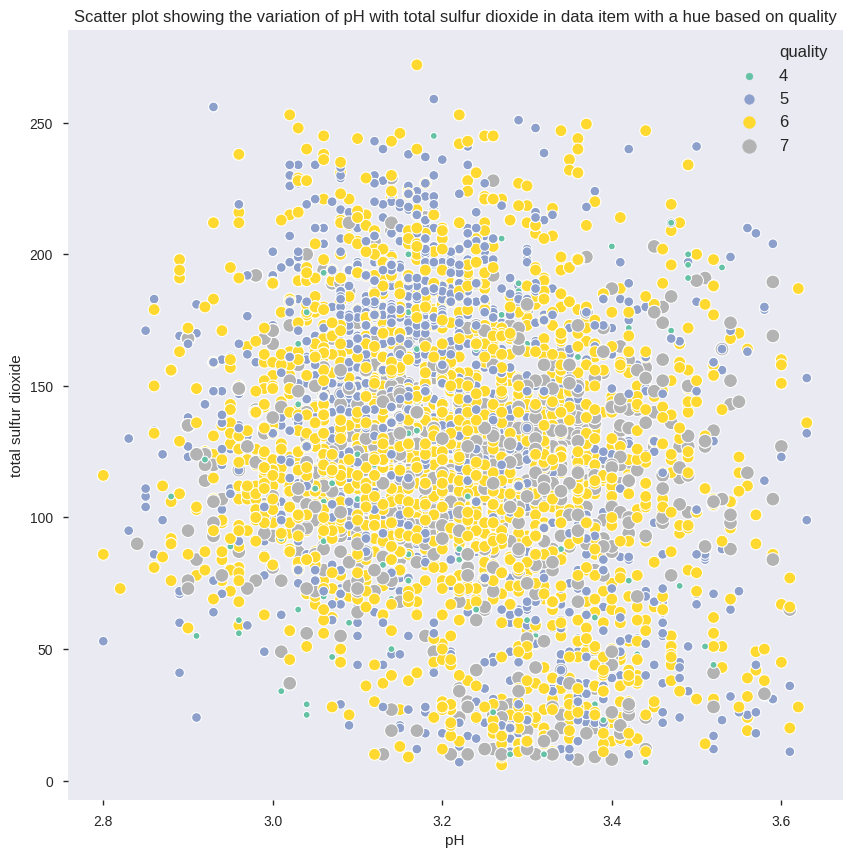

In [191]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_wine_clean, x='pH', y='total sulfur dioxide',hue='quality',palette="Set2",cmap='red', size='quality')
plt.title('Scatter plot showing the variation of pH with total sulfur dioxide in data item with a hue based on quality')
plt.grid(False)
plt.legend(fontsize=12)

# Conclusions derived from multivariate analysis
- it can be observed that with decreasing Sulphate content and increased alcohol content , the quality can be enhanced.
- low density and low fixed acidity together produce a higher quality of wine .
- a lower pH with a low content of sulphur molecules, better quality is produced.
- a lower chloride level with low acidity also results into an ideal wine quality.


<a id=section601></a>
#  Actionable Insights
  - To make a wine that tastes good, the key is to have a perfect balance between the sweetness and the sourness in the drink. 
  - During winemaking, yeast typically converts all the sugar into alcohol making a dry wine. However, sometimes not all the sugar is fermented by the yeast, leaving some sweetness leftover. Hence a balance is required.
  - Seems like most people generally like wines that contain a higher percentage of alcohol, ones that make them feel woozy!
  - The best quality of wines have a higher alcohol content but having acidity level also low.
  -Sulphates add a bit of a “sharp” taste. These need to be in a high content which would complement the alcohol taste as well.
  That sweet sugar sensation is mainly due to the sugar content in the wine. This can be actual sugar sweetness or fruit sweetness. Alcohol itself is also a sweet liquid, so higher alcohol wines can give the perception of a ‘sweet’ taste.
  -Acids should be balanced between sweeter, deeper flavors, producing a wine that is fine in taste. A wine’s complexity is judged by the number of flavors and notes that one can find in it, and is considered an important mark of quality.
  